In [8]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_mouse_clinical_df = pd.merge(mouse_df, clinical_df, how = 'outer')

# Display the data table for preview

combined_mouse_clinical_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [145]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group_mouse_clinical = combined_mouse_clinical_df.groupby(['Drug', 'Timepoint'])
mean_tumor = group_mouse_clinical['Tumor Volume (mm3)'].mean()


# Convert to DataFrame
mean_tumor_df = pd.DataFrame(mean_tumor)
# Preview DataFrame
mean_tumor_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [148]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

st_err_tumor = combined_mouse_clinical_df.groupby(("Drug", "Timepoint"))
st_err = st_err_tumor['Tumor Volume (mm3)'].sem().reset_index()

# Convert to DataFrame

st_err_df = pd.DataFrame(st_err)

# Preview DataFrame
st_err_df.head(10)



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [77]:
# Minor Data Munging to Re-Format the Data Frames
st_err_unstack= st_err.unstack(level = 0)

# Preview that Reformatting worked
st_err_unstack.head(15)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [146]:
mean_tumor_unstack = mean_tumor.unstack(level = 0)

mean_tumor_unstack.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


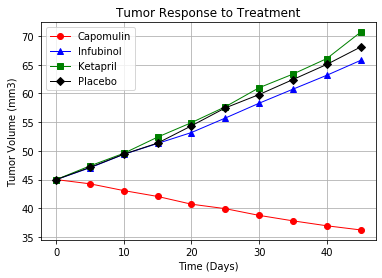

In [154]:

# Generate the Plot (with Error Bars)

capomulin_tumor = mean_tumor_unstack['Capomulin']
infubinol_tumor = mean_tumor_unstack['Infubinol']
ketapril_tumor = mean_tumor_unstack['Ketapril']
placebo_tumor = mean_tumor_unstack['Placebo']

x_axis = np.arange(0,50 , 5)
plt.plot(x_axis, capomulin_tumor, linewidth = 1, marker = "o", color="red",label = 'Capomulin')
plt.plot(x_axis, infubinol_tumor, linewidth = 1, marker = "^", color = "blue", label = 'Infubinol')
plt.plot(x_axis, ketapril_tumor, linewidth = 1, marker = "s", color = "green", label = 'Ketapril')
plt.plot(x_axis, placebo_tumor, linewidth = 1, marker = "D", color = "black", label = 'Placebo')
plt.title ('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')


plt.legend()
plt.grid()
plt.show

# Save the Figure
plt.savefig('../Images/Treatment')


## OBSERVATION 1

## As we see on the graphic the drug that can reduce the volume of the tumor was "Capomulin", the other  drugs
## "Infubinol", "Ketapril" and "Placebo" increase the volume of the tumor during 45 days of treatment.


In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [84]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_response = combined_mouse_clinical_df.groupby(("Drug","Timepoint"))
met_mean = met_response['Metastatic Sites']. mean()


# Convert to DataFrame

met_mean_df = pd.DataFrame(met_mean)

# Preview DataFrame

met_mean_df.head()



Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [86]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

#std_err_met = combined_mouse_clinical_df.groupby(("Drug", "Timepoint"))
std_err_met = met_response['Metastatic Sites'].sem()

# Convert to DataFrame
std_err_met_df = pd.DataFrame(std_err_met)

# Preview DataFrame

std_err_met_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [135]:
met_mean_unstack = met_mean.unstack(level = 0)

met_mean_unstack.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


<function matplotlib.pyplot.show(*args, **kw)>

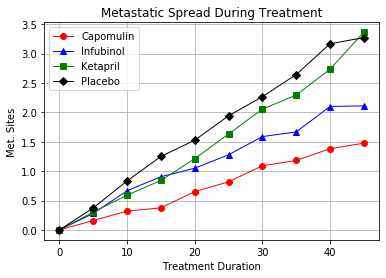

In [157]:
# Generate the Plot (with Error Bars)

capomulin_met = met_mean_unstack['Capomulin']
infubinol_met = met_mean_unstack['Infubinol']
ketapril_met = met_mean_unstack['Ketapril']
placebo_met = met_mean_unstack['Placebo']

x_axis = np.arange(0,50 , 5)
plt.plot(x_axis, capomulin_met, linewidth = 1, marker = "o", color="red",label = 'Capomulin')
plt.plot(x_axis, infubinol_met, linewidth = 1, marker = "^", color = "blue", label = 'Infubinol')
plt.plot(x_axis, ketapril_met, linewidth = 1, marker = "s", color = "green", label = 'Ketapril')
plt.plot(x_axis, placebo_met, linewidth = 1, marker = "D", color = "black", label = 'Placebo')
plt.title ('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration')
plt.ylabel('Met. Sites')

plt.legend()
plt.grid()


# Save the Figure
plt.savefig('../Images/Met')
# Show the Figure
plt.show


## OBSERVATION 2
## Metastatic during treatment, all drugs tested on the treatment cause metastatic but the drug with better results
## was "Capomulin"


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [149]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

met_response = combined_mouse_clinical_df.groupby(("Drug","Timepoint"))
survival_rates = met_response['Mouse ID']. count() 



# Convert to DataFrame
survival_rates_df = pd.DataFrame(survival_rates)

# Preview DataFrame
survival_rates_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [160]:
# Minor Data Munging to Re-Format the Data Frames
survival_rates_unstack = survival_rates.unstack(level = 0)


# Preview the Data Frame
survival_rates_unstack

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


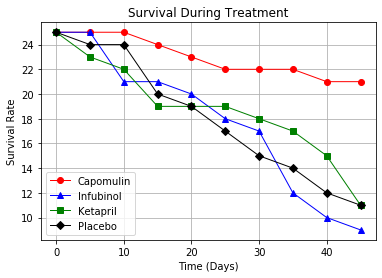

In [158]:
capomulin_survival = survival_rates_unstack['Capomulin']
infubinol_survival = survival_rates_unstack['Infubinol']
ketapril_survival = survival_rates_unstack['Ketapril']
placebo_survival = survival_rates_unstack['Placebo']

x_axis = np.arange(0,50 , 5)
plt.plot(x_axis, capomulin_survival, linewidth = 1, marker = "o", color="red",label = 'Capomulin')
plt.plot(x_axis, infubinol_survival, linewidth = 1, marker = "^", color = "blue", label = 'Infubinol')
plt.plot(x_axis, ketapril_survival, linewidth = 1, marker = "s", color = "green", label = 'Ketapril')
plt.plot(x_axis, placebo_survival, linewidth = 1, marker = "D", color = "black", label = 'Placebo')
plt.title ('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate')


plt.legend()
plt.grid()
plt.show


plt.savefig('../Images/Survival')


##OBSERVATION 3

## for the mouse survival during treatment as we can see on the graphic the mouse exposed to the drug "Capomulin" only 
## died 4 mouse, "Infubinol" was the worst only survived 9 mouses 

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [140]:
# Calculate the percent changes for each drug
mean_tumor_df.head()



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)